# Práctica 1
# Introducción - Conceptos básicos
# ---------------------------------------------------

Esta práctica se centra en familiarizar al estudiante con los conceptos básicos del aprendizaje automático: introducción, visualización de datos, preprocesamiento, limpieza de datos y generación de subconjuntos de entrenamiento y test.

## 1.- Description de la base de datos "Pima Indian Diabetes" 

En este conjunto de datos el objetivo es predecir, basándose en distintas mediciones, si un paciente tendrá diabetes. Todos los pacientes son mujeres de al menos 21 años de edad de la raza Pima.

    * Embarazos: Número de embarazos
    * Glucosa: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral
    * Presión sanguínea: Presión sanguínea diastólica (mm Hg)
    * Grosor de la piel: Grosor del pliegue de la piel del tríceps (mm)
    * Insulina: Insulina en suero de 2 horas (mu U/ml)
    * IMC: Índice de masa corporal (peso en kg/(altura en m)^2)
    * DiabetesPedigreeFunction: Función de pedigrí de la diabetes
    * Edad: Edad (años)
    * Resultado: Clase (0 o 1) 
            1 a tenido diabletes

#### Preguntas: Teniendo en cuenta la descripción anterior de la base de datos  "Diabetes de los indios Pima", justifique su respuesta a las siguientes preguntas sin utilizar ningún software:

1.1. ¿Podría utilizar directamente alguna de las variables como el resultado deseado de un clasificador? ¿Cuál sería el propósito del clasificador? Explique qué variable (o variables) utilizaría como datos de entrada del clasificador.
- Si, la variable resultado. El propósito del clasificador es clasificar entre diabetes y no diabetes. Las variables de entrada pueden ser todas las descitas anteriormente menos resultado.

1.2 ¿Podría utilizar directamente (sin aplicar un procesamiento previo) cualquiera de las variables proporcionadas en el conjunto de datos como salida deseada para construir un regresor? La variable de salida para abordar regresion tenia que ser continua, por lo que las variables que se podrian utilizar son la glucosa, imc, insulina. Por ejemplo la variable edad se tendría que preprocesar para poder utilizarla. ***
- Sí siempre y cuando las variables sean continuas. Para construir un regresor las características deben de ser continuas.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss

In [2]:
# Cargamos la base de datos
data = pd.read_csv("pima_indian_diabetes.csv") #Podemos cargar otra base de datos

In [3]:
# Describimos nuestro conjunto de datos. Nos sirve para analizar nuestros datos, por el ejmplo vemos que el 
#BloodPresure tiene en min=0, lo cual es imposible
#Los porcentajes son percentiles, el valor que deja el x% de los datos a su izquierda
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Dimensiones de la base de datos; 768 filas (pacientes) y 9 columnas (atributos)
print(data.shape)

In [5]:
# El número total de valores únicos por características, valores distintos que no coinciden
# los valores unicos son importantes para detectar outlines o errores
print(data.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [6]:
# cantidad de embarazos, 135 pacientes han tenido un embarazo
data["Pregnancies"].value_counts() 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [7]:
#Esta base de datos esta desbalanceada, ya que tenemos muchos mas valores de una variable y pocas de la otra
data["Outcome"].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:title={'center':'Pregnancies'}>

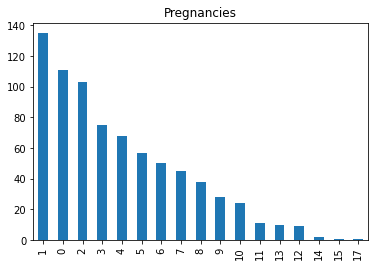

In [8]:
# Número de pacientes en función del número de embarazos
data['Pregnancies'].value_counts().plot.bar(title="Pregnancies")

<AxesSubplot:title={'center':'Outcome'}>

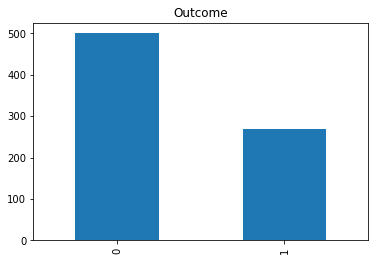

In [9]:
# Número de casos y controles
data['Outcome'].value_counts().plot.bar(title="Outcome")

In [10]:
# Agrupe en funcion de la salida y en funcion del numero de embarazos, clasificamos los valores de cada atributo para ver 
# las diferencias entre tener diabetes o no
data.groupby(['Outcome', 'Pregnancies']).mean() 

Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome Pregnancies                                                         
0       0            111.945205      69.205479      21.054795   77.561644   
        1            104.254717      66.830189      23.047170   84.320755   
        2            105.214286      61.940476      20.107143   72.619048   
        3            109.604167      65.708333      17.520833   62.020833   
        4            117.555556      71.577778      18.422222   78.466667   
        5            111.666667      74.666667      17.166667   46.861111   
        6            115.352941      66.382353      18.705882   69.029412   
        7            121.000000      70.350000      19.350000   72.500000   
        8            106.625000      75.312500      12.937500   14.500000   
        9            107.000000      70.400000      22.400000   71.200000   
        10           117.571429      72.857143      10.571429   25.071429   
        11           113.250000      81.000000      10.000000    0.000000   
        12           111.000000      80.200000      24.600000   31.800000   
        13           117.200000      74.400000      22.000000   50.000000   
1       0            144.236842      63.210526      24.605263   89.578947   
        1            143.793103      71.310345      29.517241  151.137931   
        2            135.473684      69.052632      28.210526  144.315789   
        3            148.444444      68.148148      24.629630  132.666667   
        4            139.913043      67.000000      10.913043   51.782609   
        5            131.190476      78.857143      17.761905   75.190476   
        6            132.375000      72.750000      15.375000   52.000000   
        7            148.800000      71.120000      21.040000   94.040000   
        8            150.000000      75.090909      20.500000  149.772727   
        9            144.944444      82.055556      20.055556   57.555556   
        10           125.600000      66.500000      22.900000   48.400000   
        11           134.000000      70.285714      28.428571  102.857143   
        12           116.750000      71.500000      30.250000  213.500000   
        13           133.800000      73.200000      12.600000    5.800000   
        14           137.500000      70.000000      27.500000   92.000000   
        15           136.000000      70.000000      32.000000  110.000000   
        17           163.000000      72.000000      41.000000  114.000000   

                           BMI  DiabetesPedigreeFunction        Age  
Outcome Pregnancies                                                  
0       0            31.727397                  0.457055  27.095890  
        1            29.616038                  0.451679  25.254717  
        2            29.679762                  0.479881  25.892857  
        3            29.231250                  0.358354  28.770833  
        4            31.255556                  0.410511  30.066667  
        5            31.100000                  0.359278  39.416667  
        6            29.591176                  0.433294  37.147059  
        7            29.975000                  0.405500  42.500000  
        8            30.693750                  0.526750  49.625000  
        9            28.840000                  0.311100  46.000000  
        10           30.114286                  0.411071  43.357143  
        11           37.125000                  0.259000  40.750000  
        12           30.560000                  0.301200  48.200000  
        13           33.280000                  0.405600  46.800000  
1       0            39.213158                  0.643368  28.578947  
        1            37.793103                  0.613759  35.103448  
        2            34.578947                  0.543737  32.947368  
        3            32.548148                  0.563333  29.481481  
        4            33.873913                  0.516478  38.086957  
        5   

# 2. Visualización, pre-procesado y limpieza de datos 
Esta sección se aborda la visualización, el preprocesamiento y la limpieza de datos. Tareas fundamentales en cualquier aplicación de análisis de datos.

## 2.1 Visualización

#### Hangs-on! 

a) Visualizar los histogramas de las variables en la base de datos, eligiendo un número de intervalos adecuados para cada variable. Justifique esta elección.


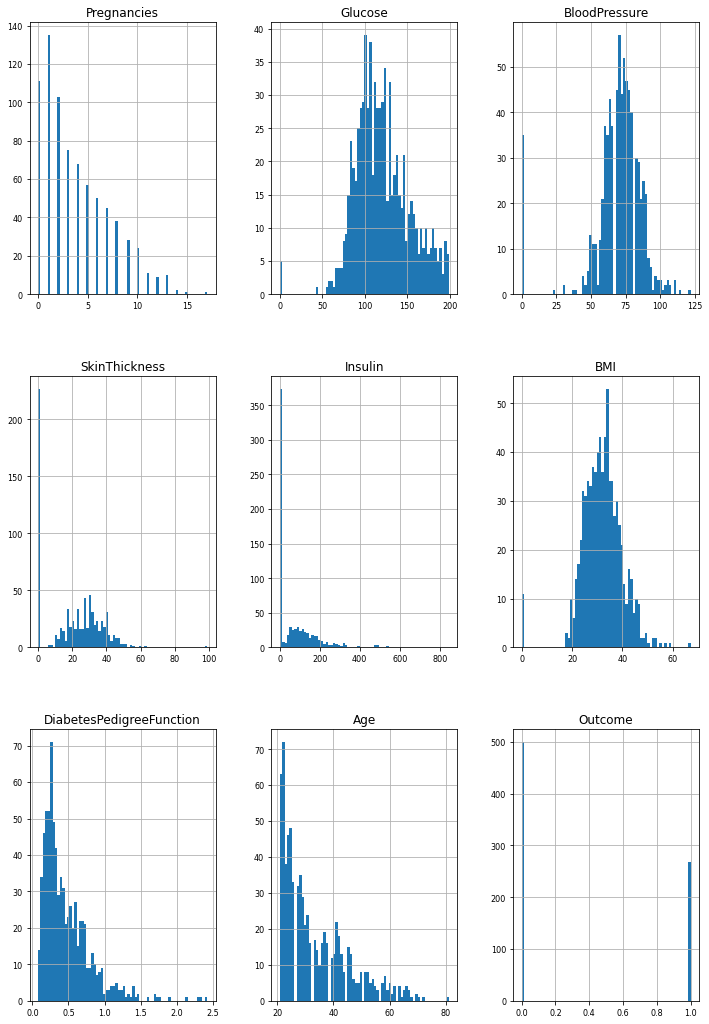

In [11]:
# Histogramas
#bins
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

b) Indicate for each variable what type it is (numerical, categorical, etc.).
- Todas las características son numericas excepto el outcome que es una variable categorica ya que la salida es: diabetes o no diabetes.

c) Indicate which variables present null values and justify how you have identified them.


In [12]:
# Valores perdidos (missing values)
data.isnull().values.any()

False

In [13]:
data.isnull().sum()
#Nos dice que ningun valor es nulo, aunque viendo los histogramas podruamos pensar que si hay

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

d) Indicate which variables present anomalous values that could be eliminated and justify how you have identified them. You can rely on other visualization tools not seen in theory, such as the box plots.

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


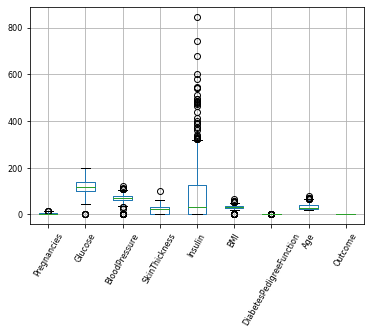

In [14]:
# Identificación de valores anómalos (Outliers)
#las rayas son el limite sup e inf, los puntitos son outliners.
#Si el numero de 0 en atributos en los que no tien sentido, nos dan falsa info
col_name=list(data.columns) 
print(col_name)
boxplot = data.boxplot(grid=True, rot=60, fontsize=8)

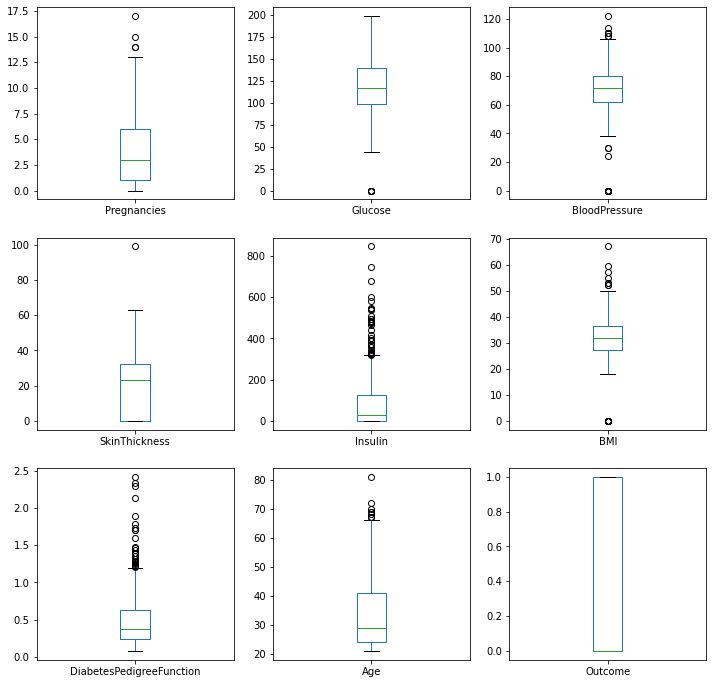

In [15]:
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

e) Represent a dispersion matrix generated for some of the variables in the
Are there any pairs of variables that have a linear or non-linear relationship between the two?
Draw the points so that you can differentiate between diabetic and non-diabetic patients
diabetics. Include the scatter matrix in the memory. Without considering the variable
"Outcome", is there a couple of variables that allow to separate these two types of
patients?

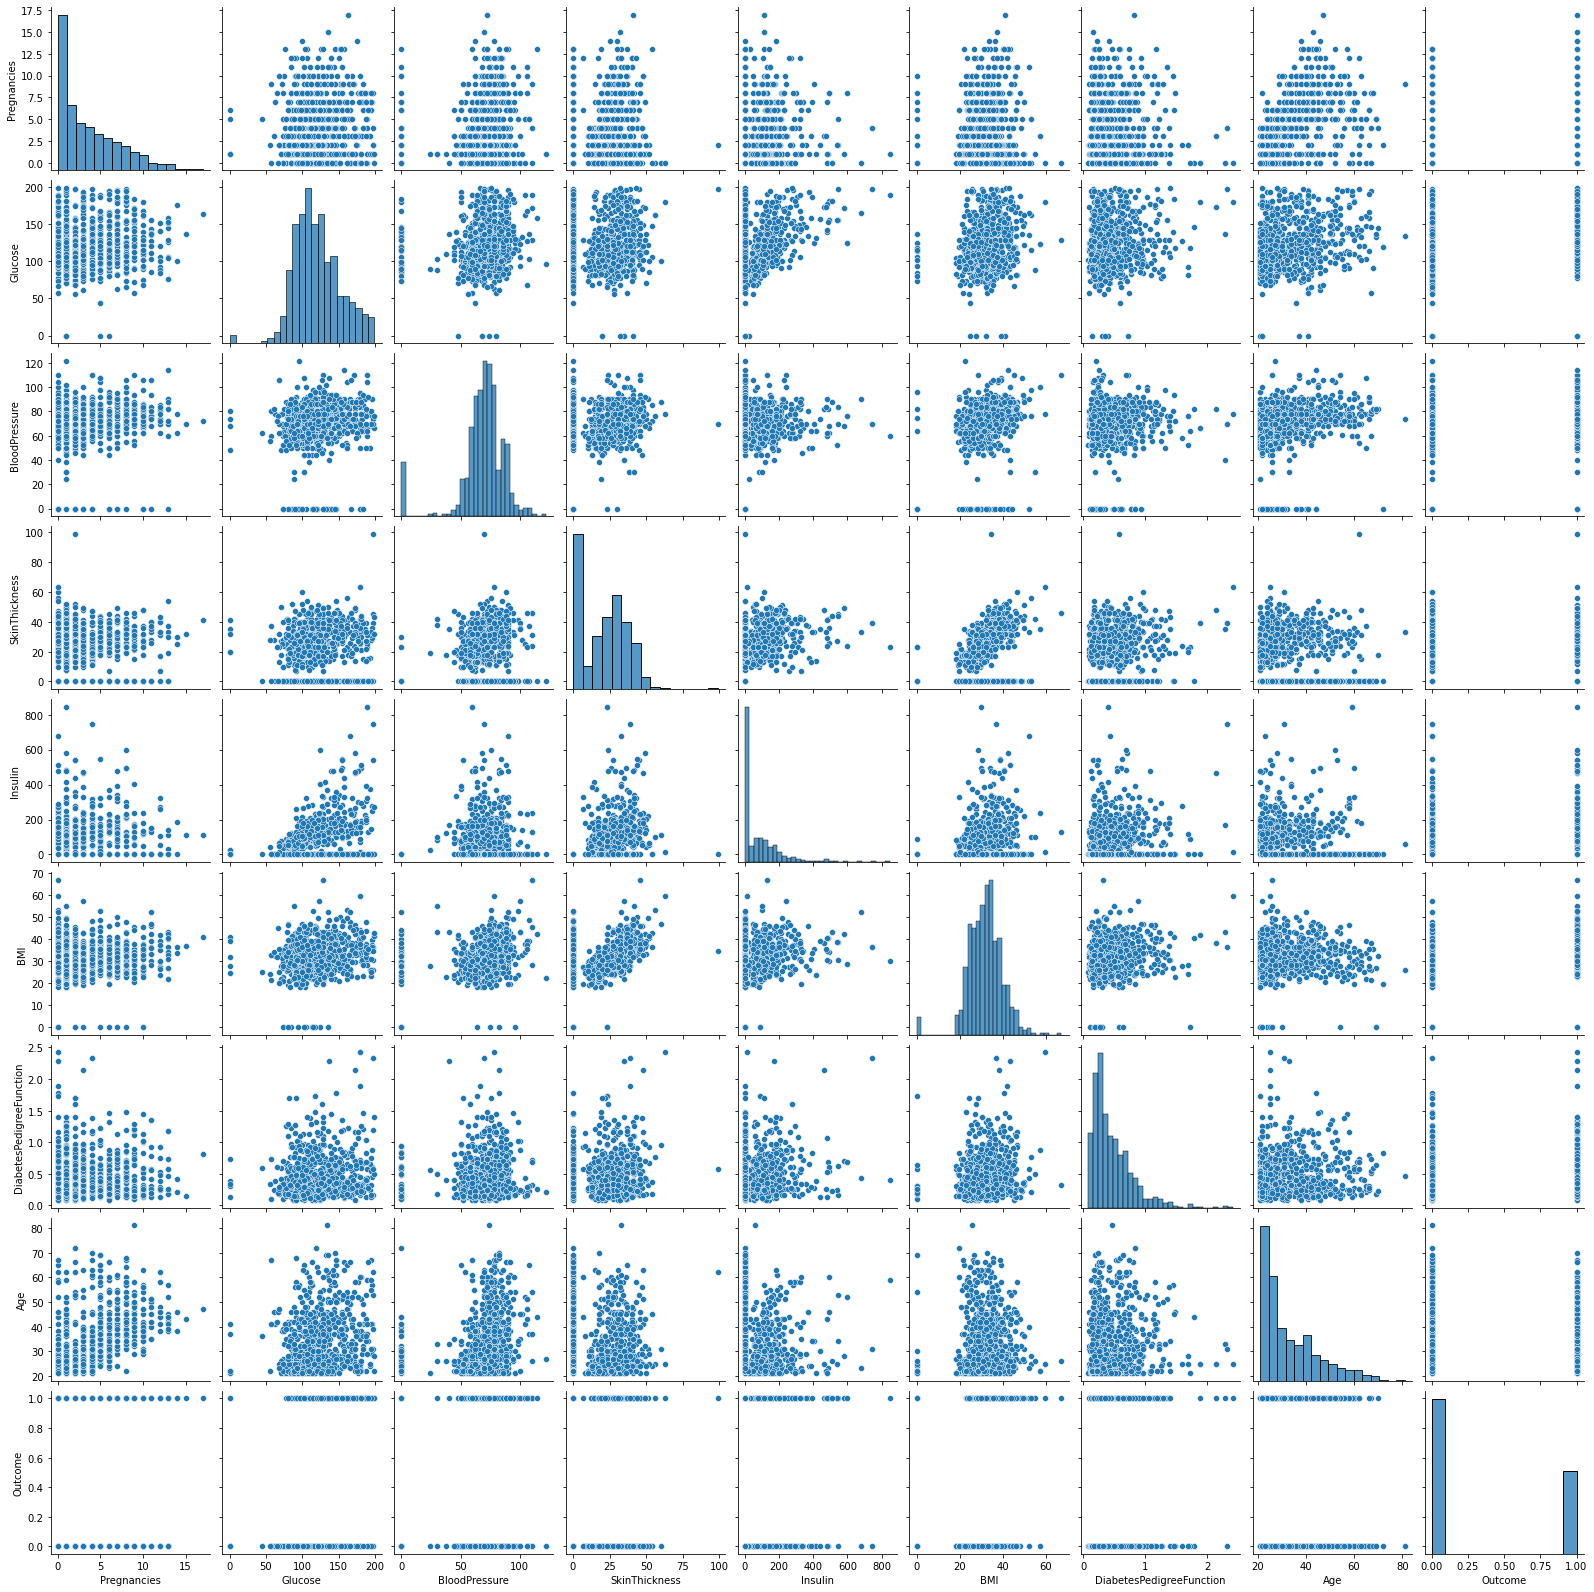

In [16]:
# Diagramas de dispersión (Scatter plots) Ver la relacion entre los atributos, comparacion entre dos variables. 
# por ej entre SKin y IBM podria pintarse una linea, parece q tienen algo de relacion
sns.pairplot(data)

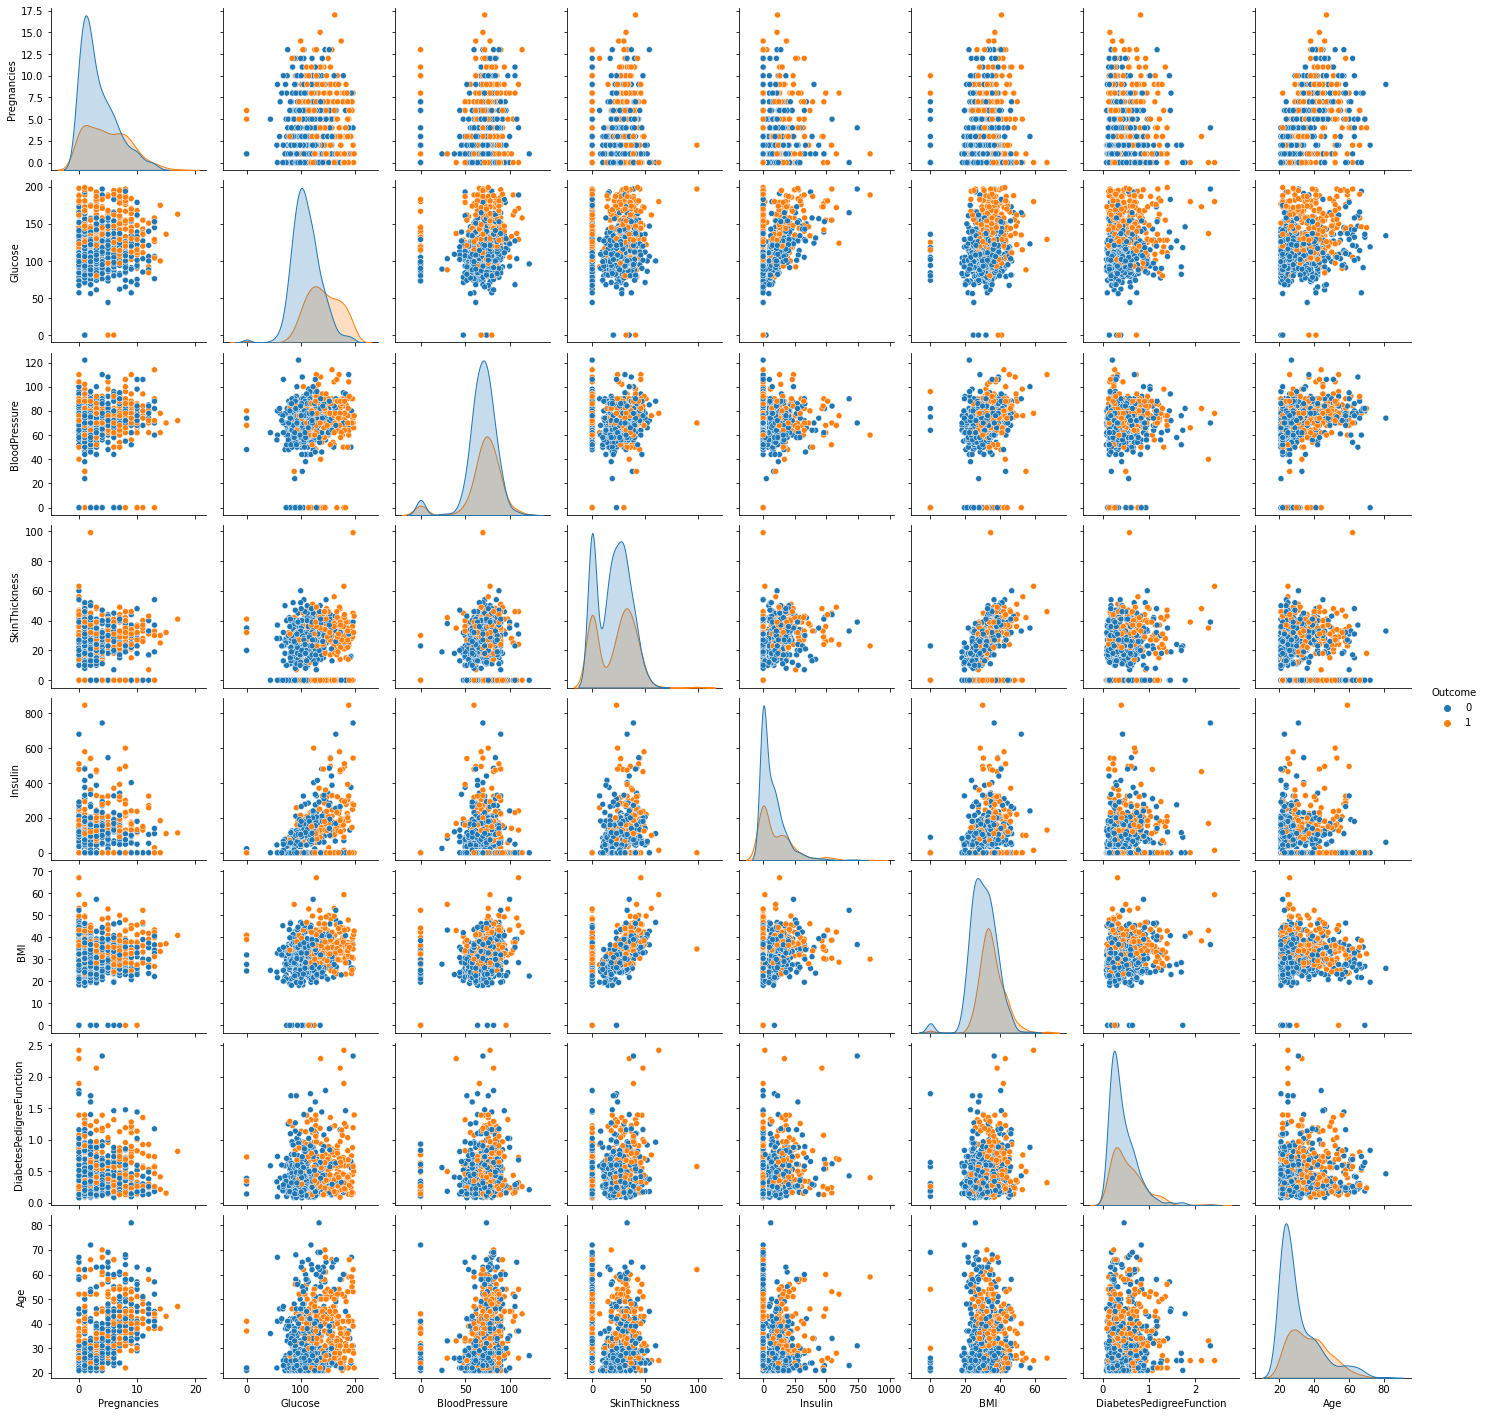

In [17]:
#en funcion de dos variables no podriamos diferenciar si tienen diabetes o no pq toda la info esta junta, no hay dos grupos
# diferenciados de puntos
sns.pairplot(data, hue = 'Outcome')

<AxesSubplot:>

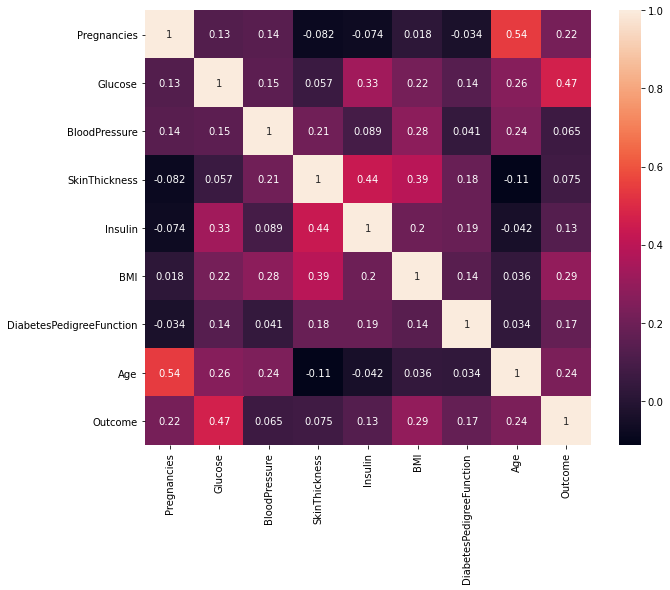

In [18]:
# con el hit map podemos ver si hay relacion entre variables. Como los max valores son 0.54 no hay mucha relacion entre ellas
# Si tengo dos variable que nos da la misma info (se parecen mucho = 1), habria que quitar una ya que en nuestro clasificador
# solo trabajaria mas sin obtener mayor resultados. Si quitamos una, va a ser mas rapido y obtiene mismo resultado
#el valor ees la correlacion lineal que existe entre las dos variables
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [19]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##  2.2 Preprocesado y limpieza

#### Hangs-on! Entregable

#### Práctica asociada al tema 1(2.5%)
#### Para esta práctica

    • Los estudiantes subirán al Aula Virtual el código Python asociado a los apartados del 2.2 a) al f).
    
    - Además, incluirán sólo un vídeo explicativo de una duración máxima de 3 minutos con el siguiente nombre de archivo: Practica1_Apellido1_Nombre1_Apellido2_Nombre2. Ambos miembros deben comentar y discutir los resultados mostrados en el video.
    
    - Los vídeos de más de 3 minutos no serán evaluados.

a) Basándose en los histogramas, indique para cada variable el número de valores incorrectos o anómalos (valores outliers). También se puede utilizar z-score para cada muestra en el conjunto de datos y especificar un umbral (por ejemplo, 2,5, 3, 3,5 o más desviaciones estándar).

Explique el procedimiento seguido para obtener este número. A la vista de los resultados, detállese el proceso que se seguiría para poder aplicar los métodos de aprendizaje automático en este conjunto de datos.

In [20]:
Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

18.0


b)  Basándose en los histogramas, indique para cada variable analizada el número de valores que faltan (missing values). Explique el procedimiento seguido para obtener dicho número. A la vista de los resultados, detalle el proceso que seguiría para aplicar los métodos de aprendizaje automático a este conjunto de datos.

In [ ]:
data[data.Insulin == 0].shape

In [ ]:
data[data.BloodPressure == 0].shape

c) Si alguna de las variables analizadas presenta valores perdido, impute (sustituya) los valores faltantes por un estadístico dependiente de los atributos.

In [ ]:
data[['BloodPressure']] = data[['BloodPressure']].replace(0, np.nan)

In [ ]:
data.isnull().any()

d) Visualice de nuevo los histogramas de las variables después de haber hecho la limpieza de datos. Explique los resultados obtenidos. ¿Considera necesario realizar siempre la imputación de
los valores perdidos? Justifique su respuesta..

e)  Considere los dos tipos de normalización que se han visto en teoría: la normalización mín-máx y la normalización para obtener un conjunto de datos normalizados. Observe los histogramas de dos variables considerando los dos tipos de normalización anteriores. Justifique los resultados obtenidos, así como las ventajas y desventajas de cada tipo de normalización.

f) Considere la característica llamada "Outcome". Indique si las clases están desbalanceadas. Si lo están, indique qué podría hacer para resolver este problema.

## 2.3 Conjuntos de entranamiento, validación y test

En esta sección, los casos disponibles se separarán en dos subconjuntos: un subconjunto de entrenamiento y un subconjunto de test. Los subconjuntos no compartirán ningún caso en común. El subconjunto de entrenamiento se utilizará en los próximos módulos para realizar el aprendizaje de algunos modelos, y el subconjunto de test para evaluar su rendimiento.

Antes de realizar la separación en subconjuntos, responda de manera razonada (justificando su respuesta) a las siguientes cuestiones:


a) ¿Qué porcentaje de los casos disponibles considerará en el subconjunto de entrenamiento? ¿Y en el subconjunto de test? 
- 70-30% o 80-20%. Hay que separar en train y el test siempre.

b) Considera que construyes un clasificador binario (dos clases, C1 y C2). Discuta lo que sucedería al evaluar el rendimiento del clasificador si el subconjunto de entrenamiento con el que se diseña el clasificador tuviera casi todos los casos de la clase C1 y el subconjunto de prueba tuviera casi todos los casos de la clase C2.
- Se produciria un sobreaprendizaje de la clase C1, y una memorización de la clase C2 por lo que el algoritmo aprende a memorizar y clasificaria la mayoría de datos de la clase C2 de manera incorrecta.

c) ¿Cómo se puede evitar el sobreentrenamiento en el diseño del clasificador? Haciendo validación cruzada ¿Cuál sería el
proceso a seguir para encontrar los mejores parámetros de ese modelo? ***


d) Explique qué herramientas, de las presentadas en el curso, utilizaría para comprobar a grandes rasgos si cada variable del subconjunto de entrenamiento sigue la misma distribución que la variable correspondiente del subconjunto de test. 
- Realizaría un análisis visual mediante histogramas, boxplot, o scatter plot pero siempre con el conjunto de test y training por separado.

e) Discuta lo que debe hacer con el conjunto de datos originales si encuentra que la distribución de los casos del subconjunto de prueba es diferente de la distribución del subconjunto de entrenamiento. ***
- Hay que hacer otra particion. Normalizar

### Separación de datos  $\rightarrow$ Práctica 2

In [ ]:
# Creamos el conjunto de entrada (x) y de salida (y)
x = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]

x.shape, y.shape

In [ ]:
# Dividimos los datos en dos conjuntos: entrenamiento y test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x, y = shuffle(x,y, random_state=0) #los mezclamos
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [ ]:
# Normalizamos las variables. EL conjunto test no estaban, por lo que no conocemos su media. Por ello utilizo el scaler para
# estandarizar.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)